# 오차 수정하기: 경사 하강법
기울기 a를 너무 크게 잡으면 오차가 커지고 기울기를 너무 작게 잡아도 오차가 커진다.  
기울기 a와 오차 사이에는 이렇게 y = x\*\*2의 상관 관계가 있다.  
그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법이 있으며 미분 기울기를 이용하는 **경사 하강법(gradient descent)**임

## 학습률(learning rate)
경사 하강법에서 기울기의 부호를 바꿔 이동시킬 때 이동 거리를 정해주는것

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 Y의 리스트를 만들기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]


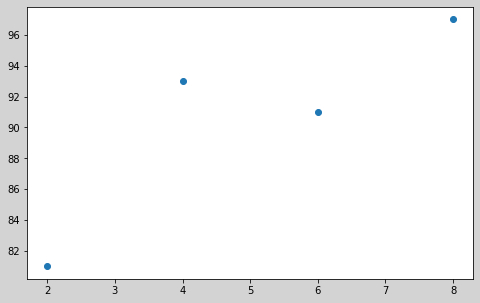

In [4]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'lightgray'

# 그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()


epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


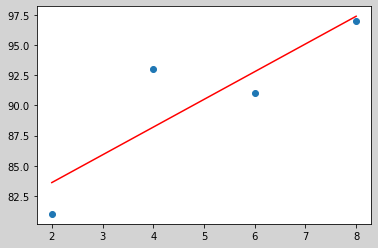

In [5]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.03
# 몇 번 반복될지 설정
epochs = 2001

for i in range(epochs):
    y_pred = a * x_data + b
    error = y_data - y_pred # 오차 구하는 식
    a_diff = -(2/len(x_data)) * np.sum(x_data * error)  # 오차함수를 a로 미분한 값
    b_diff = -(2/len(x_data)) * np.sum(error)           # 오차함수를 b로 미분한 값
    a = a - lr * a_diff  # 학습률을 곱해 기존의 a값 업데이트
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값 업데이트
    if i % 100 == 0:
        print("epoch=%.f, 기울기=%.4f, 절편=%.4f" % (i, a, b))

# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)], color='red')   # x_data 최소값, y_pred 최소값을 x1, y1으로 각각의 최대값을 x2, y2로 하여 라인을 긋는다
plt.show()

# 다중 선형 회귀
공부 시간과 성적만으로는 정확하지 않음으로 

In [6]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]   # 공부시간
x2 = [i[1] for i in data]   # 과외시간
y = [i[2] for i in data]    # 점수

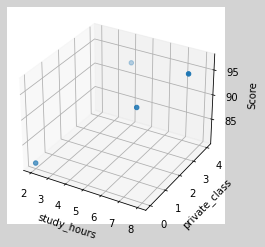

In [7]:
# 3차원 그래프 그리기
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1, x2, y)
plt.show()

In [8]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [9]:
# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0
lr = 0.02 # 학습률
# 몇 번 반복할지 설정
epochs = 2001

# 경사 하강법 시작
for i in range(epochs): # epoch 수만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b    # y를 구하는 식 세우기
    error = y_data - y_pred # 오차를 구하는 식
    # 오차 함수를 a1로 미분한 값
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
    # 오차 함수를 a2로 미분한 값
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
    # ㅊ차 함수를 b로 미분한 값
    b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)
    a1 = a1 - lr * a1_diff      # 학습률을 곱해 기존의 a1 값 업데이트
    a2 = a2 - lr * a2_diff      # 학습률을 곱해 기존의 a2 값 업데이트
    b = b - lr * b_diff         # 학습률을 곱해 기존의 b 값 업데이트
    if i % 100 == 0:
        print("epoch=%.f, a1=%.4f a2=%.4f b=%.4f" % (i, a1, a2, b))

epoch=0, a1=18.5600 a2=8.4500 b=3.6200
epoch=100, a1=7.2994 a2=4.2867 b=38.0427
epoch=200, a1=4.5683 a2=3.3451 b=56.7901
epoch=300, a1=3.1235 a2=2.8463 b=66.7100
epoch=400, a1=2.3591 a2=2.5823 b=71.9589
epoch=500, a1=1.9546 a2=2.4427 b=74.7362
epoch=600, a1=1.7405 a2=2.3688 b=76.2058
epoch=700, a1=1.6273 a2=2.3297 b=76.9833
epoch=800, a1=1.5673 a2=2.3090 b=77.3948
epoch=900, a1=1.5356 a2=2.2980 b=77.6125
epoch=1000, a1=1.5189 a2=2.2922 b=77.7277
epoch=1100, a1=1.5100 a2=2.2892 b=77.7886
epoch=1200, a1=1.5053 a2=2.2875 b=77.8209
epoch=1300, a1=1.5028 a2=2.2867 b=77.8380
epoch=1400, a1=1.5015 a2=2.2862 b=77.8470
epoch=1500, a1=1.5008 a2=2.2860 b=77.8518
epoch=1600, a1=1.5004 a2=2.2859 b=77.8543
epoch=1700, a1=1.5002 a2=2.2858 b=77.8556
epoch=1800, a1=1.5001 a2=2.2858 b=77.8563
epoch=1900, a1=1.5001 a2=2.2857 b=77.8567
epoch=2000, a1=1.5000 a2=2.2857 b=77.8569


In [10]:
# 5시간 공부하고, 3시간 학원 공부 했을떄
a1 * 5 + a2 * a2 + b


90.58162332557694